In [1]:
from KGS import *

d = d_spacing(2.464000, 2.464000, 6.711000, 90.000000, 90.000000, 120.000000, np.array([0,0,2]))

print('d =', d)

lam = E_to_lambda(5)

print('lambda =',lam)

print('bragg angle = ', bragg_angle(lam, d))

d = 3.3554999999999997
lambda = 4.0449854875177085
bragg angle =  54.13440762599879


x: [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
y: [0.06633491 0.00862039 0.09469926 0.19180682 0.02819476]
y_err: [0.1 0.1 0.1 0.1 0.1]


<ErrorbarContainer object of 3 artists>

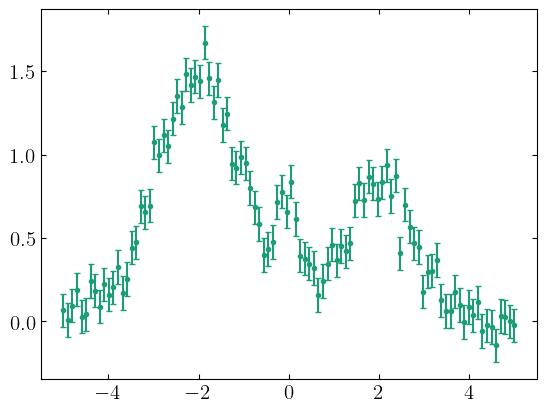

In [2]:
def generate_dataset(size=100, noise_level=0.1):
    np.random.seed(42)  # For reproducibility

    x = np.linspace(-5, 5, size)
    
    # Parameters for three Gaussian functions
    params1 = [1.5, -2, 1]
    params2 = [0.8, 2, 0.8]
    params3 = [0.6, 0, 0.2]

    y = (
        gauss(x, *params1) +
        gauss(x, *params2) +
        gauss(x, *params3) +
        np.random.normal(0, noise_level, size)
    )

    y_err = np.full_like(y, noise_level)

    return x, y, y_err

# Generate dataset
x_data, y_data, y_err_data = generate_dataset()

# Print a few data points for illustration
print("x:", x_data[:5])
print("y:", y_data[:5])
print("y_err:", y_err_data[:5])

plt.errorbar(x_data, y_data, yerr=y_err_data, fmt='.')

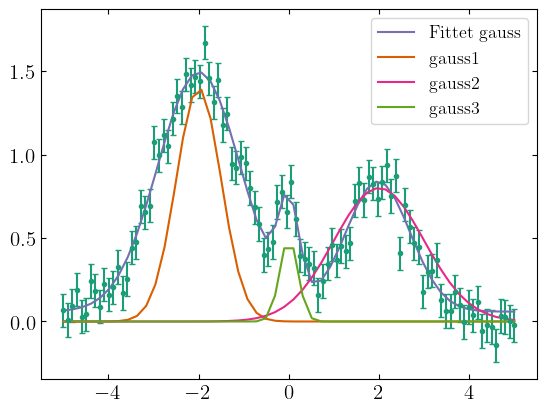

In [3]:



from cProfile import label


def model(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, b):
    return gaussN(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3)+b


params = {'A1': 1.4, 'mu1':-2, 'sigma1': -0.5, 
          'A2': 0.8, 'mu2': 2, 'sigma2': 1, 
          'A3': 0.5, 'mu3': 0, 'sigma3': 0.2, 
          'b':0.01}

limits = {'sigma1': (0.5, 2),'A2':(0.5,None), 'mu3':(-1,1)}


gaussN_fit = fit(x_data, y_data, y_err_data, model, params,limits=limits)


x_range = np.linspace(min(x_data), max(x_data))
plt.errorbar(x_data, y_data, yerr=y_err_data, fmt='.')
plt.plot(x_range, model(x_range, *gaussN_fit.values),label='Fittet gauss')
for i in range(1,4):
    plt.plot(x_range, gauss(x_range, params[f"A{i}"], params[f"mu{i}"], params[f"sigma{i}"]), label=f'gauss{i}')

plt.legend(fontsize=13)


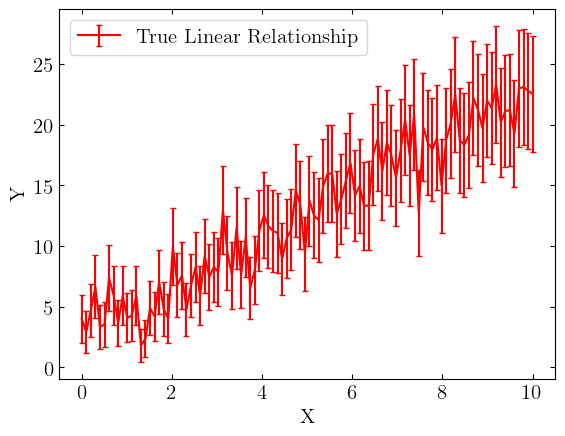

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.88                      │              Nfcn = 41               │
│ EDM = 7.28e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   2.05    │   0.11    │            │            │         │         │       │
│ 1 │ b    │    2.2    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │  0.0121 -0.0399 │
│ b │ -0.0399   0.221 │
└───┴─────────────────┘

In [4]:
np.random.seed(42)

# Parameters for the linear equation
slope = 2
intercept = 3

# Generate linearly spaced x values
x_values = np.linspace(0, 10, 100)

# Generate linear y values with some random noise
y_values = slope * x_values + intercept + np.random.normal(scale=2, size=len(x_values))

y_err = np.sqrt(y_values)


plt.errorbar(x_values, y_values, y_err, color='red', label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


guess = {'a':1, 'b': 4}

lin_fit = fit(x_values, y_values, y_err, lin, guess)
display(lin_fit.hesse())



In [5]:
from scipy.interpolate import interp1d
import warnings
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


In [6]:
import matplotlib
import matplotlib.cm as cm
import numpy as np

# Get the Set2 colormap
cmap = cm.get_cmap('Set2_r')

# Generate equally spaced values from 0 to 1 (since colormaps map values from 0 to 1)
norm = np.linspace(0, 1, 8)

# Get the RGBA values for each norm value and convert to hex
hex_colors = [matplotlib.colors.to_hex(cmap(norm_value)) for norm_value in norm]

print("Hex codes for Set2 colormap:")
print(hex_colors)

Hex codes for Set2 colormap:
['#b3b3b3', '#e5c494', '#ffd92f', '#a6d854', '#e78ac3', '#8da0cb', '#fc8d62', '#66c2a5']


/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_1840/1857762213.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2_r')


In [7]:
import seaborn as sns

# Get the hexadecimal color codes for the "hls" palette with 8 colors
colors_hls = sns.color_palette("Set2", 8).as_hex()

# Print the list of hexadecimal color codes
print(colors_hls)

sns.light_palette("Set2", n_colors=8, input="husl", reverse=True)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


TypeError: husl_to_rgb() takes 3 positional arguments but 4 were given